# Introduction to CPTAC
This tutorial will introduce you to the CPTAC dataset through a (new) Python package called `cptac` that was written to access the CPTAC data. This package is similar to `TCGAbiolinks`. The package `cptac` is written using `pandas` dataframes. These dataframes are great and similar to some of the dataframes we navigated in R. This tutorial will introduce you to some of the uses of `pandas`. There is also a `pandas` cheat sheet in the Shared Folder that we recommend saving for future reference. 

`cptac` documentation: https://pypi.org/project/cptac/

### Installing and Importing `cptac`
Just as in R, we need to install before we can load in `cptac` to our current python environment. This installation only needs to occur once. In your terminal, install `cptac` into your conda environment. Double check that your conda environment is activated. At the very start of the line in the terminal, `(base)` means no conda environment is active. `(name_of_environment)` tells which conda environment you have activated. 

Install `cptac` with `pip install cptac`. Return to this notebook and run `import cptac`. If you are having trouble, try to close and restart the notebook.

### Start exploring CPTAC with `cptac` (!!)
Similar to `TCGAbiolinks`, we need to access and download the data. Take note of this syntax as you will need it for future reference.

In [4]:
import cptac
cptac.list_datasets()

,Description,Data reuse status,Publication link
Dataset name,,,
Brca,breast cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33212010/
Ccrcc,clear cell renal cell carcinoma (kidney),no restrictions,https://pubmed.ncbi.nlm.nih.gov/31675502/
Colon,colorectal cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/31031003/
Endometrial,endometrial carcinoma (uterine),no restrictions,https://pubmed.ncbi.nlm.nih.gov/32059776/
Gbm,glioblastoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33577785/
Hnscc,head and neck squamous cell carcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33417831/
Lscc,lung squamous cell carcinoma,password access only,unpublished
Luad,lung adenocarcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/32649874/
Ovarian,high grade serous ovarian cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/27372738/


In [5]:
cptac.download(dataset="Brca")
br = cptac.Brca()

The following lists the data available for the breast cancer dataset. Notice that even though this is through cptac (proteomics), we can also accesss the accompanying transcriptomics, CNV, etc. Additionally, we will be focusing on the proteomics, but acetylproteomics and phosphoproteomics are also interesting aspects to explore. They encompass "post-translational modifications". That is the addition of acetyl or phosphate groups to proteins after they are translated. This can often give insight into which proteins are being used in which cellular pathways. 

In [6]:
br.list_data()

Below are the dataframes contained in this dataset:
	acetylproteomics
		Dimensions: (122, 9868)
	clinical
		Dimensions: (122, 23)
	CNV
		Dimensions: (122, 23692)
	derived_molecular
		Dimensions: (122, 32)
	followup
		Dimensions: (276, 95)
	phosphoproteomics
		Dimensions: (122, 38775)
	proteomics
		Dimensions: (122, 10107)
	somatic_mutation
		Dimensions: (24106, 3)
	transcriptomics
		Dimensions: (122, 23121)


In [7]:
protein_data = br.get_proteomics()

#The dataframes are MultIndex pandas dataframes. 
#However, to teach the basics of pandas, we will remove the "multi" part of the dataframe.
protein_data = protein_data.droplevel(1, axis=1)

protein_data

Name,A1BG,A2M,A2ML1,AAAS,AACS,AADAT,AAED1,AAGAB,AAK1,AAMDC,...,ZSCAN31,ZSWIM8,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Patient_ID,,,,,,,,,,,,,,,,,,,,,
CPT000814,-0.6712,-0.2075,2.7959,1.3969,-1.0899,NaN,1.6708,-0.3484,-0.4756,-0.7299,...,-5.2868,-0.6536,0.3384,2.1169,1.3910,-2.1230,0.9136,-0.8082,-1.4793,0.9136
CPT001846,1.3964,1.3302,-5.0948,0.7674,-1.6845,NaN,2.1022,-0.5814,0.2916,-2.2857,...,-0.7592,0.4711,0.6018,0.2062,-0.2137,-2.1219,0.0860,2.5814,-0.2852,-0.1074
X01BR001,2.0219,1.6269,-3.2943,0.3352,-1.0739,1.2255,0.2754,-1.1187,-0.0534,-0.2519,...,NaN,0.2306,-0.3010,0.3395,-0.5316,NaN,0.4996,0.7622,-1.5607,0.0256
X01BR008,-0.5290,0.3267,1.4342,0.4938,-2.8676,NaN,NaN,-1.0691,-0.3643,-1.8173,...,-2.1789,0.2695,0.1506,1.0498,0.7546,1.7889,-0.2499,-0.2590,-0.1263,0.3725
X01BR009,1.2556,3.4489,2.8043,-0.2956,-1.7261,NaN,NaN,-2.0471,-0.3547,-0.8298,...,-2.3990,-0.2596,0.1898,-0.5010,-0.4189,0.3080,0.5057,0.2181,-0.2288,-0.2750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X21BR001,-0.6610,-0.6402,-4.8578,1.2319,-1.6491,NaN,NaN,-0.3074,-0.3074,-0.0266,...,-0.2528,0.5090,0.0306,0.4908,-0.5570,2.3864,0.3764,-0.6974,1.3541,1.1123
X21BR002,-1.3735,0.4227,-4.9553,0.6327,-3.1434,NaN,NaN,0.3071,0.7562,-1.6912,...,-3.3351,0.1548,1.0792,-0.6619,-1.4444,-0.3704,0.4909,0.3938,0.2992,-0.3494
X21BR010,1.1583,0.3329,-5.7358,-0.1658,-2.0413,-1.2433,0.9090,-0.2410,0.6717,-0.1651,...,-0.7054,0.2752,0.8850,-2.6704,-0.9444,-1.9717,0.0650,0.6300,-0.0686,0.1798


### Introduction to Pandas
The following commands are basics to navigate through pandas dataframes. First we import pandas as a comman alias, `pd`. Remember there are additional python and pandas resources in the Shared Folder

In [8]:
import pandas as pd

In [9]:
#Juptyer gives a nice format for viewing pandas dataframes
protein_data

Name,A1BG,A2M,A2ML1,AAAS,AACS,AADAT,AAED1,AAGAB,AAK1,AAMDC,...,ZSCAN31,ZSWIM8,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Patient_ID,,,,,,,,,,,,,,,,,,,,,
CPT000814,-0.6712,-0.2075,2.7959,1.3969,-1.0899,NaN,1.6708,-0.3484,-0.4756,-0.7299,...,-5.2868,-0.6536,0.3384,2.1169,1.3910,-2.1230,0.9136,-0.8082,-1.4793,0.9136
CPT001846,1.3964,1.3302,-5.0948,0.7674,-1.6845,NaN,2.1022,-0.5814,0.2916,-2.2857,...,-0.7592,0.4711,0.6018,0.2062,-0.2137,-2.1219,0.0860,2.5814,-0.2852,-0.1074
X01BR001,2.0219,1.6269,-3.2943,0.3352,-1.0739,1.2255,0.2754,-1.1187,-0.0534,-0.2519,...,NaN,0.2306,-0.3010,0.3395,-0.5316,NaN,0.4996,0.7622,-1.5607,0.0256
X01BR008,-0.5290,0.3267,1.4342,0.4938,-2.8676,NaN,NaN,-1.0691,-0.3643,-1.8173,...,-2.1789,0.2695,0.1506,1.0498,0.7546,1.7889,-0.2499,-0.2590,-0.1263,0.3725
X01BR009,1.2556,3.4489,2.8043,-0.2956,-1.7261,NaN,NaN,-2.0471,-0.3547,-0.8298,...,-2.3990,-0.2596,0.1898,-0.5010,-0.4189,0.3080,0.5057,0.2181,-0.2288,-0.2750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X21BR001,-0.6610,-0.6402,-4.8578,1.2319,-1.6491,NaN,NaN,-0.3074,-0.3074,-0.0266,...,-0.2528,0.5090,0.0306,0.4908,-0.5570,2.3864,0.3764,-0.6974,1.3541,1.1123
X21BR002,-1.3735,0.4227,-4.9553,0.6327,-3.1434,NaN,NaN,0.3071,0.7562,-1.6912,...,-3.3351,0.1548,1.0792,-0.6619,-1.4444,-0.3704,0.4909,0.3938,0.2992,-0.3494
X21BR010,1.1583,0.3329,-5.7358,-0.1658,-2.0413,-1.2433,0.9090,-0.2410,0.6717,-0.1651,...,-0.7054,0.2752,0.8850,-2.6704,-0.9444,-1.9717,0.0650,0.6300,-0.0686,0.1798


### Indexing into a pandas dataframe
Pandas dataframe has rows and columns that are called "indices" and "columns" respectively. 

In [10]:
protein_data.index

Index(['CPT000814', 'CPT001846', 'X01BR001', 'X01BR008', 'X01BR009',
       'X01BR010', 'X01BR015', 'X01BR017', 'X01BR018', 'X01BR020',
       ...
       'X20BR002', 'X20BR005', 'X20BR006', 'X20BR007', 'X20BR008', 'X21BR001',
       'X21BR002', 'X21BR010', 'X22BR005', 'X22BR006'],
      dtype='object', name='Patient_ID', length=122)

In [11]:
#Print out the columns of protein_data, using .columns


Q: What do the indices(rows) and columns of protein_data represent?

A: 

In [12]:
#Use the len() function to answer the following. 
#How many patients are in this cptac dataset?
#How many genes are listed in protein_data?

#Hint: Is patients the index or columns? Use .index and .columns!


In [13]:
#Use can also view the dimensions of a pandas dataframe via df.shape
#What are the dimensions of protein_data using .shape?
#Check your understanding: What does .shape print out? Consider the previous block of code


There are multiple ways to index into a dataframe that you will see below. The first is to access an entire column using `dataframe["name_of_column"]`

In [14]:
#Use this format to access all rows of the ESR1 column 


Another way to index into pandas dataframes is using `.iloc` and `.loc`. `.iloc` uses the numerical indices of a row and column. For example the top left element of a dataframe (named df) would be accessed via `df.iloc[1,1]`. The `.loc` uses the name of a row and column. For example `df.loc["row_name", "col_name"]`. 

In [15]:
#Use iloc to access the element at (23,54) in protein_data


In [16]:
#Use loc to access row="X01BR017" and column="ESR1" 
#How would you interpret this value?


In [68]:
#You can also access all columns of one row by using an :
protein_data.loc["CPT000814", :]
protein_data.iloc[0,:]

Name
A1BG     -0.6712
A2M      -0.2075
A2ML1     2.7959
AAAS      1.3969
AACS     -1.0899
           ...  
ZXDC     -2.1230
ZYG11B    0.9136
ZYX      -0.8082
ZZEF1    -1.4793
ZZZ3      0.9136
Name: CPT000814, Length: 10107, dtype: float64

Q: Which type(s) of indexing into the pandas dataframe do you think will be most helpful in this project?

A:


## Additional datatypes in cptac
You can also access other datatypes using the `cptac` python package for the same patients. 

In [17]:
rna_data = br.get_transcriptomics()
clinical_data = br.get_clinical()

In [18]:
#Notice: Does this look similar or different to the previous data we were working with?
rna_data

Name,A1BG,A1BG-AS1,A1CF,A2M,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Patient_ID,,,,,,,,,,,,,,,,,,,,,
CPT000814,-0.2020,0.4851,NaN,-1.0264,5.3754,-1.7357,-2.6428,-1.0939,NaN,0.2623,...,0.2799,0.5755,-0.5886,-0.7428,1.5763,2.3063,-0.9448,0.6603,0.2159,0.1554
CPT001846,1.5602,0.8676,NaN,-1.1659,-2.3353,1.7850,7.8635,1.3619,NaN,-0.0019,...,0.4305,-0.4707,-2.0699,-2.0325,-0.0221,NaN,0.0745,1.9567,-0.4364,-0.1601
X01BR001,-0.4547,1.7415,NaN,-0.3769,2.1803,1.3121,NaN,0.8310,NaN,-0.3131,...,-0.2010,-1.6472,0.3005,0.3112,0.3747,1.0260,0.2738,-0.0211,0.3720,-0.6570
X01BR008,-1.4653,0.4251,NaN,-0.5979,5.8009,0.5635,-2.6931,-1.0861,NaN,0.0043,...,0.3331,1.3433,-1.8711,-1.3578,0.0305,1.3676,-1.6430,0.3679,0.6431,-0.1793
X01BR009,1.0341,2.0925,NaN,0.6195,7.0649,-0.7143,NaN,0.2492,-2.2484,0.4772,...,-0.0054,-1.0478,-1.3751,-1.8079,-0.1200,-4.6279,-0.8619,-0.0338,1.5769,-0.6337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X21BR001,-0.0196,0.2171,NaN,-0.3940,-2.0997,1.0183,6.4045,-0.2501,-1.7260,0.6178,...,-0.7115,0.1819,-1.2171,-1.3631,1.3455,NaN,-0.7515,0.3044,1.3806,-1.1197
X21BR002,NaN,NaN,NaN,2.1073,-4.0915,NaN,NaN,3.8259,NaN,0.6250,...,-0.7193,-0.3678,-1.8014,-1.4538,1.5637,NaN,-0.5786,0.8320,1.0435,-1.1151
X21BR010,-3.2675,-1.0806,NaN,0.4900,NaN,-0.1154,NaN,-5.5735,NaN,-1.2094,...,-0.6299,-3.1189,0.7028,0.7773,-0.1069,-4.5936,0.9043,-1.5439,-1.4296,0.9932


In [19]:
clinical_data

Name,Replicate_Measurement_IDs,Sample_Tumor_Normal,Age.in.Month,Gender,Race,Human.Readable.Label,Experiment,Channel,Stage,PAM50,...,ER.IHC.Score,PR.IHC.Score,Coring.or.Excision,Ischemia.Time.in.Minutes,Ischemia.Decade,Necrosis,Tumor.Cellularity,Total.Cellularity,In.CR,QC.status
Patient_ID,,,,,,,,,,,,,,,,,,,,,
CPT000814,CPT000814,Tumor,NaN,NaN,black.or.african.american,CPT000814 0004,13,127C,Stage IIA,Basal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC.pass
CPT001846,CPT001846,Tumor,NaN,NaN,white,CPT001846 0005,12,128C,Stage III,Basal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC.pass
X01BR001,X01BR001,Tumor,660.0,female,black.or.african.american,[17]-af938b_D2,2,129N,Stage IIB,Basal,...,0,0,coring,0.0,1.0,10.0,70.0,50.0,yes,QC.pass
X01BR008,X01BR008,Tumor,NaN,NaN,NaN,[cf]-467c39_D1,16,127C,NaN,Basal,...,NaN,NaN,NaN,NaN,NaN,0.0,90.0,60.0,no,QC.pass
X01BR009,X01BR009,Tumor,NaN,NaN,NaN,[0e]-051582_D1,16,127N,NaN,Basal,...,NaN,NaN,NaN,NaN,NaN,0.0,80.0,70.0,no,QC.pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X21BR001,X21BR001,Tumor,NaN,NaN,white,[1f]-d9108c,16,128N,NaN,LumB,...,NaN,NaN,NaN,NaN,NaN,0.0,60.0,80.0,no,QC.pass
X21BR002,X21BR002,Tumor,NaN,NaN,white,[32]-22665e,16,128C,NaN,LumA,...,NaN,NaN,NaN,NaN,NaN,0.0,65.0,60.0,no,QC.pass
X21BR010,X21BR010|X21BR010.REP1,Tumor,852.0,female,white,[68]-4d3e43_D2,3|17,129C|128C,Stage IIA,LumA,...,3+,3+,excision,18.0,2.0,0.0,60.0,55.0,yes,QC.pass


In [20]:
#Use your knowledge of the unique() function from the first tutorial 
#What do you need to import?
#Now use the unique function on the PAM50 column of clinical data



In [21]:
#What is the race distribution of the 122 patients?



In [45]:
#What if we are interested in race and subtype distribution?
#Follow the steps to find the percent of each subtype in each race

#Notice that there are some NaN's in the Race column. 
#The .fillna() allows us to replace all NaN's with "Not reported"
clinical_data["Race"] = clinical_data["Race"].fillna("Not reported")

#Use the unique() function to find the different races
race_list = list( #place unique() function in here )
    
#repeat for the PAM50 column
pam50_list = list(  )

#We will append the total number of patients for each race
total_race = []

#We will now use a NESTED FOR LOOP
for race in race_list:
    #print race for clarity 
    
    #PAUSE and make sure you understand these line. We are back to boolean indexing!
    race_boolean_mask = clinical_data["Race"] == race 
    pam50_column_of_race = clinical_data["PAM50"][ race_boolean_mask ]
    
    #fill in the (). Think about how to get the number of patients of a certain race
    total_race.append(  )
    
    for subtype in pam50_list:
        #print subtype for clarity
                #create a boolean_mask using the pam50_column_of_race that is True when it is equal to subtype and false otherwise
        pam50_race_mask = 
        num_pam50_and_race_patients = sum( pam50_race_mask )
        
        #Calculate the percent of patients in a race group with subtype
        #Create a print statement that prints out relevant information
        #Example: 30% of black.or.african.american patients are LumA

SyntaxError: invalid syntax (<ipython-input-45-48a8d7b4a0e4>, line 15)

In [48]:
#We are interested in age, but notice that age is listed in months
#Create a new column in clinical_data that has age in years
clinical_data["Age_in_years"] = clinical_data["Age.in.Month"] #fill in with correct math 
        

In [55]:
#Pandas has handy min(), max(), mean(), median(), etc. 
print( clinical_data["Age_in_years"].min() )

#Try the other functions!

30.916666666666668


In [56]:
#Get creative. Use what you've learned in Python to create a new column in clinical_data called Age_category
#For patients under 40, assign "Young", 41-59 "Mid", and 60+ is "Old"
#There are multiple ways to do this. You can use a for loop (they are pretty fast in python) or use boolean indexing!
#How many young, old, and mid patients are there?


## Plotting in Python
There are two primary libraries that are used to plot in Python: `matplotlib` and `seaborn`. `seaborn` is built ontop of `matplotlib` so they are very similar.

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

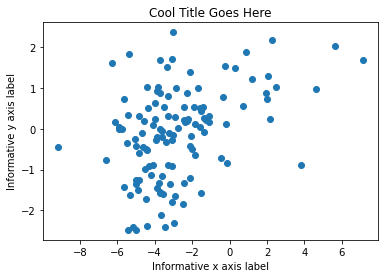

In [74]:
#We might want to compare the transcriptomics and proteomics of the same gene
#Check for understanding: Why might this be of interest? What is the expected the relationship between the two?

#Pick your favorite gene and assign it to the gene variable
gene = "TP53"

#assert statements are important for ensuring your code is running correctly
#The program will only continue running if the statement after assert is True
assert gene in rna_data.columns
assert gene in protein_data.columns

#We also want to check that the patients are in the same order for rna_data and protein_data.
#Write an assert statement that checks this. Fill in parathensis
assert list( ) == list(  )

#for matplotlib we always have to create a figure before we plot!
plt.figure()

#x axis will be the proteomics data of the particular gene. 
#Set x_data equal to the column of protein_data that corresponds to your gene
x_data = 

#y axis will be the transcriptomics data of the particular gene. 
#Set x_data equal to the column of rna_data that corresponds to your gene
y_data = 

#Use matplotlib's scatter() function to create a scatter plot. Is this what you expect
plt.scatter( x_data, y_data )

#Edit the figure
plt.title("Cool Title Goes Here")
plt.xlabel("Informative x axis label")
plt.ylabel("Informative y axis label")

#This is used to explicitly print out the figure. Later we will save the figure
plt.show()